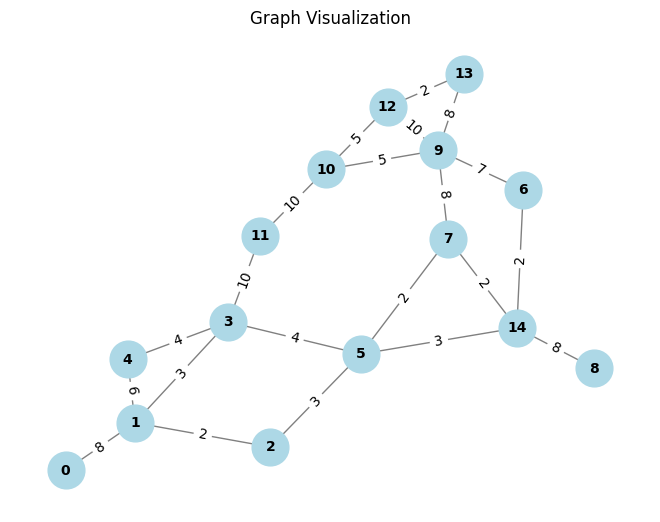

In [22]:
# Importing the necessary libraries
import networkx as nx
import matplotlib.pyplot as plt

# Define edges and their weights
edges = [
    (0, 1, 8), (1, 2, 2), (1, 3, 3), (1, 4, 6),
    (2, 5, 3), (3, 4, 4), (3, 5, 4), (3, 11, 10),
    (5, 7, 2), (5, 14, 3), (6, 14, 2), (6, 9, 7),
    (7, 14, 2), (7, 9, 8), (8, 14, 8), (9, 10, 5),
    (9, 12, 10), (9, 13, 8), (10, 12, 5), (10, 11, 10),
    (12, 13, 2)
]
# Create graph
G = nx.Graph()
G.add_weighted_edges_from(edges)

# Draw the graph
pos = nx.spring_layout(G)  # Define positions of nodes
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')

# Display edge weights
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the plot
plt.title("Graph Visualization")
plt.show()

In [23]:
# Importing the necessary libraries
import numpy as np
import heapq

# Graph edges (node1, node2, distance)
edges = [
    (0, 1, 8), (1, 2, 2), (1, 3, 3), (1, 4, 6),
    (2, 5, 3), (3, 4, 4), (3, 5, 4), (3, 11, 10),
    (5, 7, 2), (5, 14, 3), (6, 14, 2), (6, 9, 7),
    (7, 14, 2), (7, 9, 8), (8, 14, 8), (9, 10, 5),
    (9, 12, 10), (9, 13, 8), (10, 12, 5), (10, 11, 10),
    (12, 13, 2)
]

# Demand matrix (example)
demand_matrix = np.array([
    [0, 400, 200, 60, 80, 150, 75, 75, 30, 160, 30, 25, 35, 0, 0],
    [400, 0, 50, 120, 20, 180, 90, 90, 15, 130, 20, 10, 10, 5, 0],
    [200, 50, 0, 40, 60, 180, 90, 90, 15, 45, 20, 10, 10, 5, 0],
    [60, 120, 40, 0, 50, 100, 50, 50, 15, 240, 40, 25, 10, 5, 0],
    [80, 20, 60, 50, 0, 50, 25, 25, 10, 120, 20, 15, 5, 0, 0],
    [150, 180, 180, 100, 50, 0, 100, 100, 30, 880, 60, 15, 15, 10, 0],
    [75, 90, 90, 50, 25, 100, 0, 50, 15, 440, 35, 10, 10, 5, 0],
    [75, 90, 90, 50, 25, 100, 50, 0, 15, 440, 35, 10, 10, 5, 0],
    [30, 15, 15, 15, 10, 30, 15, 15, 0, 140, 20, 5, 0, 0, 0],
    [160, 130, 45, 240, 120, 880, 440, 440, 140, 0, 600, 250, 500, 200, 0],
    [30, 20, 20, 40, 20, 60, 35, 35, 20, 600, 0, 75, 95, 15, 0],
    [25, 10, 10, 25, 15, 15, 10, 10, 5, 250, 75, 0, 70, 0, 0],
    [35, 10, 10, 10, 5, 15, 10, 10, 0, 500, 95, 70, 0, 45, 0],
    [0, 5, 5, 5, 0, 10, 5, 5, 0, 200, 15, 0, 45, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])

# Create the graph as an adjacency list
n_nodes = 15  # Adjust based on the edges
graph = {i: [] for i in range(n_nodes)}
for u, v, w in edges:
    graph[u].append((v, w))
    graph[v].append((u, w))  # Undirected graph

# Dijkstra's algorithm to find shortest paths
def dijkstra(graph, start):
    distances = {node: float('inf') for node in graph}
    previous_nodes = {node: None for node in graph}
    distances[start] = 0
    pq = [(0, start)]  # (distance, node)

    while pq:
        current_dist, node = heapq.heappop(pq)

        if current_dist > distances[node]:
            continue

        for neighbor, weight in graph[node]:
            distance = current_dist + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = node
                heapq.heappush(pq, (distance, neighbor))

    # Reconstruct paths
    paths = {}
    for node in graph:
        path = []
        current = node
        while current is not None:
            path.append(current)
            current = previous_nodes[current]
        path.reverse()
        paths[node] = path  # Store the full path

    return distances, paths

# Build the demand summation matrix
def build_demand_summation_matrix(demand_matrix, all_shortest_paths):
    num_nodes = len(demand_matrix)
    demand_summation_matrix = np.zeros((num_nodes, num_nodes))

    for start in range(num_nodes):
        for end in range(num_nodes):
            if start != end:
                path = all_shortest_paths[start][end]
                total_demand = 0

                for i in range(len(path)):
                    for j in range(i + 1, len(path)):
                        total_demand += demand_matrix[path[i], path[j]]
                        total_demand += demand_matrix[path[j], path[i]]

                demand_summation_matrix[start, end] = total_demand

    return demand_summation_matrix

# Update the demand matrix based on maximum demand
def update_demand_matrix(demand_matrix, new_demand_matrix, all_shortest_paths):
    max_value = np.max(new_demand_matrix)
    max_indices = np.unravel_index(np.argmax(new_demand_matrix), new_demand_matrix.shape)

    start, end = max_indices
    path = all_shortest_paths[start][end]
    all_paths.append(path)
    print(f"Maximum demand value: {max_value}")
    print(f"Path: {path}")

    for i in range(len(path)):
        for j in range(len(path)):
            if i != j:
                demand_matrix[path[i], path[j]] = 0
                demand_matrix[path[j], path[i]] = 0

    return demand_matrix
all_paths =[]
# Main loop to repeat the process
num_iterations = 6
for iteration in range(num_iterations):
    # Calculate shortest paths from each node
    all_shortest_paths = {}
    for node in range(n_nodes):
        _, paths = dijkstra(graph, node)
        all_shortest_paths[node] = paths

    # Calculate the new demand summation matrix
    new_demand_matrix = build_demand_summation_matrix(demand_matrix, all_shortest_paths)

    # Update the original demand matrix
    demand_matrix = update_demand_matrix(demand_matrix, new_demand_matrix, all_shortest_paths)

    # Print the updated demand matrix after each iteration
    print(f"Updated Demand Matrix after iteration {iteration + 1}:")
    print(demand_matrix)

Maximum demand value: 7870.0
Path: [0, 1, 2, 5, 7, 9, 10]
Updated Demand Matrix after iteration 1:
[[  0   0   0  60  80   0  75   0  30   0   0  25  35   0   0]
 [  0   0   0 120  20   0  90   0  15   0   0  10  10   5   0]
 [  0   0   0  40  60   0  90   0  15   0   0  10  10   5   0]
 [ 60 120  40   0  50 100  50  50  15 240  40  25  10   5   0]
 [ 80  20  60  50   0  50  25  25  10 120  20  15   5   0   0]
 [  0   0   0 100  50   0 100   0  30   0   0  15  15  10   0]
 [ 75  90  90  50  25 100   0  50  15 440  35  10  10   5   0]
 [  0   0   0  50  25   0  50   0  15   0   0  10  10   5   0]
 [ 30  15  15  15  10  30  15  15   0 140  20   5   0   0   0]
 [  0   0   0 240 120   0 440   0 140   0   0 250 500 200   0]
 [  0   0   0  40  20   0  35   0  20   0   0  75  95  15   0]
 [ 25  10  10  25  15  15  10  10   5 250  75   0  70   0   0]
 [ 35  10  10  10   5  15  10  10   0 500  95  70   0  45   0]
 [  0   5   5   5   0  10   5   5   0 200  15   0  45   0   0]
 [  0   0   0   0  

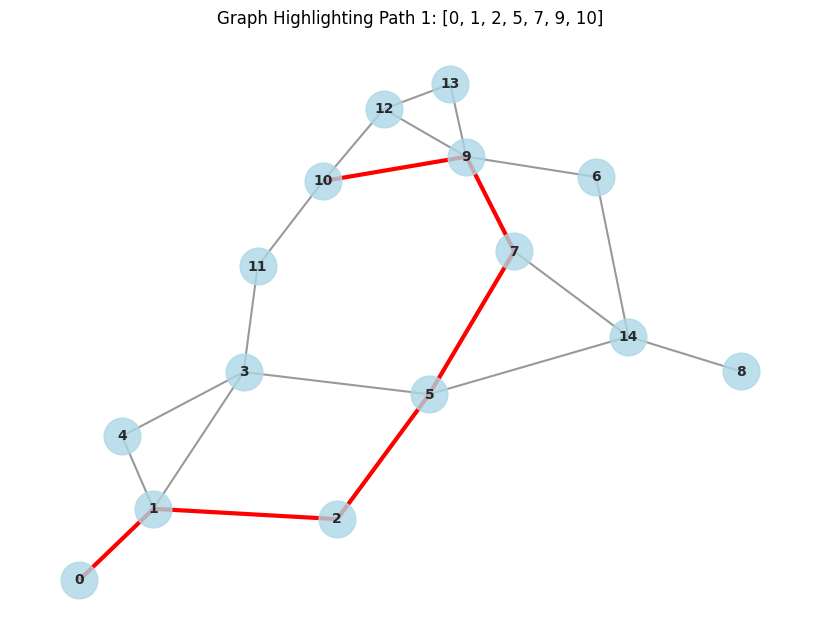

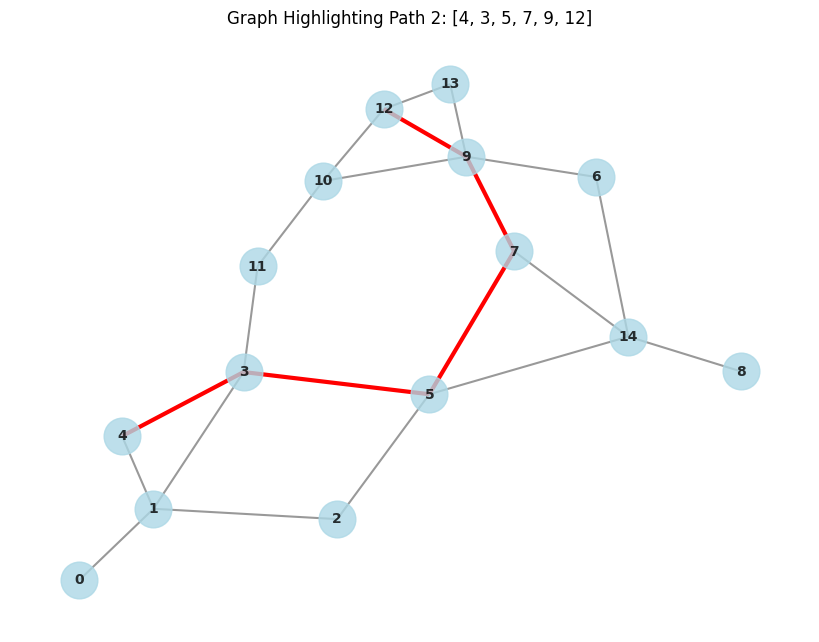

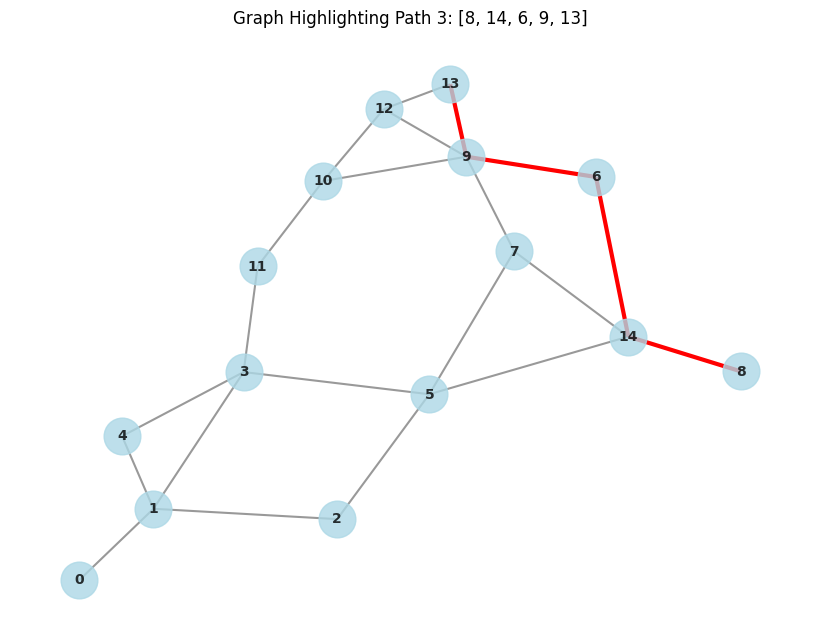

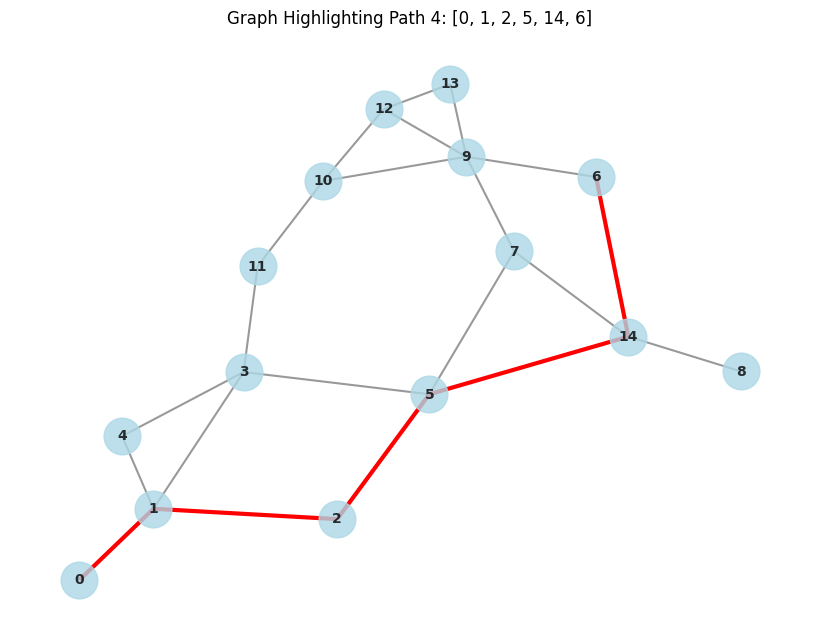

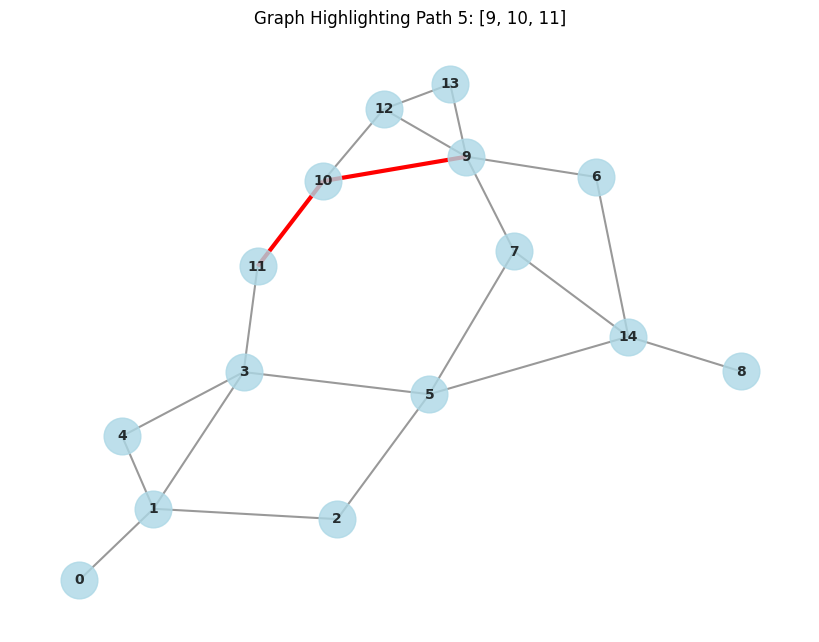

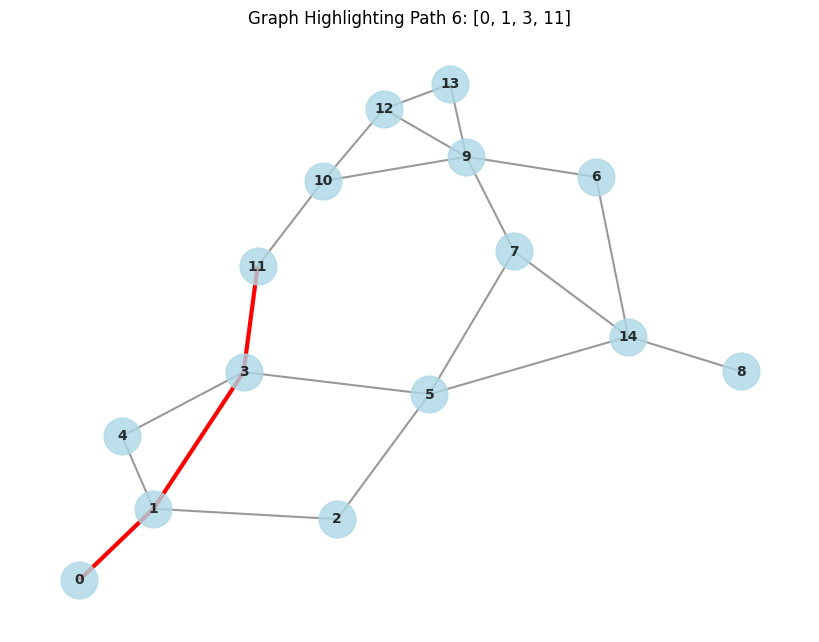

In [24]:
# Importing the necessary libraries
import networkx as nx
import matplotlib.pyplot as plt

# Define edges and their weights
edges = [
    (0, 1, 8), (1, 2, 2), (1, 3, 3), (1, 4, 6),
    (2, 5, 3), (3, 4, 4), (3, 5, 4), (3, 11, 10),
    (5, 7, 2), (5, 14, 3), (6, 14, 2), (6, 9, 7),
    (7, 14, 2), (7, 9, 8), (8, 14, 8), (9, 10, 5),
    (9, 12, 10), (9, 13, 8), (10, 12, 5), (10, 11, 10),
    (12, 13, 2)
]

# Create the main graph
G = nx.Graph()
G.add_weighted_edges_from(edges)

# Example list of paths
# Get positions for all nodes in the main graph
pos = nx.spring_layout(G)

# Iterate through each path
for idx, path in enumerate(all_paths):
    # Highlight the edges of the current path
    edges_in_path = [(path[i], path[i + 1]) for i in range(len(path) - 1)]

    # Draw the full graph
    plt.figure(figsize=(8, 6))
    nx.draw(
        G, pos, with_labels=True, node_size=700,
        node_color='lightblue', font_size=10, font_weight='bold',
        edge_color='gray', width=1.5, alpha=0.8
    )

    # Highlight the current path in red
    nx.draw_networkx_edges(
        G, pos, edgelist=edges_in_path,
        edge_color='red', width=3
    )

    # Add title and show plot
    plt.title(f"Graph Highlighting Path {idx + 1}: {path}")
    plt.show()
